# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [97]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline
# %pylab inline
sns.set(color_codes=True)
# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
print(data.columns)
room_dwell_column_name = 'RM (Room/Dwell)'
lower_status_column_name = 'LSTAT (Lower Stat%)'
pupil_tutor_ratio_column_name = 'PTRATIO (Pupil-tutor ratio)'
median_value_column_name = 'MEDV (Median Value of Homes)'
data.columns = [room_dwell_column_name, lower_status_column_name, pupil_tutor_ratio_column_name, median_value_column_name]
features = data.drop(median_value_column_name, axis = 1)

# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
data.head(10)

Index([u'RM', u'LSTAT', u'PTRATIO', u'MEDV'], dtype='object')
Boston housing dataset has 489 data points with 4 variables each.


,RM (Room/Dwell),LSTAT (Lower Stat%),PTRATIO (Pupil-tutor ratio),MEDV (Median Value of Homes)
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [98]:
# Have a look at the features. Here the MEDV is dropped
features.head(10)

,RM (Room/Dwell),LSTAT (Lower Stat%),PTRATIO (Pupil-tutor ratio)
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
5,6.430,5.21,18.7
6,6.012,12.43,15.2
7,6.172,19.15,15.2
8,5.631,29.93,15.2
9,6.004,17.10,15.2


In [99]:
# Describe the whole data
data.describe()

,RM (Room/Dwell),LSTAT (Lower Stat%),PTRATIO (Pupil-tutor ratio),MEDV (Median Value of Homes)
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [100]:
# Describe the prices value with proper formatting
prices.describe().apply(lambda x: format(x, ',.2f'))

count          489.00
mean       454,342.94
std        165,340.28
min        105,000.00
25%        350,700.00
50%        438,900.00
75%        518,700.00
max      1,024,800.00
Name: MEDV, dtype: object

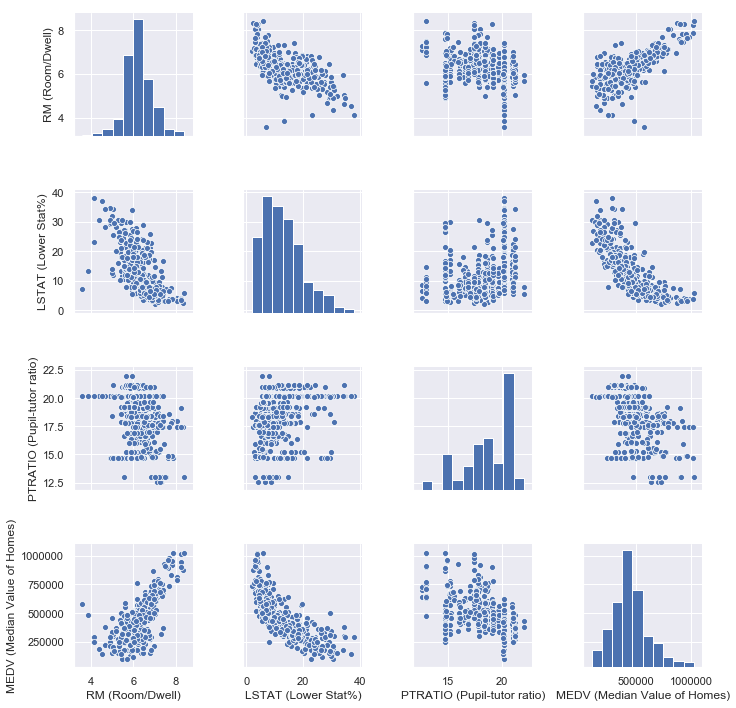

In [101]:
# Checking the pairplot
seaborn.pairplot(data)
plt.show()

### Some general observations from these plots
* MEDV decreases with the % of LSTAT going higher
* PTRATIO and MEDVAL doesn't seem to follow any pattern
* Room/Dwell tends to increase the MEDV value
* Most of the Room/Dwell seem to be clustered around 4-6 with a price ranging from 25000-50000.
* Most houses are in the range of 50000

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [102]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
* `'RM'` : 
	- The increase in the value of Rooms will lead to an increase in value of the MEDV. The reason being increasing the rooms will lead to an increase in the area of the property. But I believe there is a limit to a steep increase, cause houses that have a lot more rooms than the other neighbouring houses may not have a very big difference in price in the same locality. The reason being the purchase power may be linked to the LSTAT value. Said that if the house has more number of rooms it may go for a higher cost.
* `'LSTAT'` : 
	- The also has a say on the value of the pricing. The class may represent the purchase power of the people staying in that neighbourhood. If we keep *RM* value static then I believe we can still see the price rise with the LSTAT value depending on the population of the lower class.	- The neighbourhood also makes a difference when people are looking to buy a house, so the same person who is in a better class would like to pay more to get a house in an area where the LSTAT is lesser than an area where the LSTAT is more.
* `'PTRATIO'` : 
	- I believe this value will have *less* influence on the price of the housing price. It also depends on the amount of students in that neighbourhood i.e. the average age of the people may be. Considering *Age* is not part of dataset it will be hard to estimate.
	- In general if there are more kids in the area and the ratio of student to teacher (Student/Teacher) is large that means that a family looking for a new house will try their best to avoid this area and aim for a different area, hence it may have a price cut on the houses of this area.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [103]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true=y_true, y_pred=y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [104]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

**`Observation`**
* The result *coeffecient of determination* is 0.923 which is a pretty high score. This means in the given model the independent variable we are able to predict the dependent variable (% of total variation in y that is described by the variance in x).
* The other observation I would like to make is that the sample size is very small. There are just 5 points. This may not give a accurate R2 value. If the sample size is increased we may see different result.

**`Conclusion`**
* Though the model looks good in the first glance the number of samples are very low so I believe that the model does not capture the variation in target variable properly. If we can maintain the same 0.923 with more sample points then we can assert that this is a good model.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [105]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = (None, None, None, None)
X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.8, test_size=0.2, shuffle=True, random_state=43)
# Having a closer look at the data and its shape
print("X_train and y_train", X_train.shape, y_train.shape)
print("X_test and y_test", X_test.shape, y_test.shape)
total_train_test_size = np.add(y_train.shape, y_test.shape)
percentage_train_size = np.divide(y_train.shape, total_train_test_size.astype(np.float64)) * 100
percentage_test_size = np.divide(y_test.shape, total_train_test_size.astype(np.float64)) * 100
# Success
print("Training and testing split was successful. train percentage split: train size = {} and test size = {} of total = {}"
      .format(percentage_train_size, percentage_test_size, total_train_test_size))

('X_train and y_train', (391, 3), (391,))
('X_test and y_test', (98, 3), (98,))
Training and testing split was successful. train percentage split: train size = [79.9591002] and test size = [20.0408998] of total = [489]


#### Checking out the X_train to see how it looks in the various scatter plots
##### With shuffle = True

===Train Set===


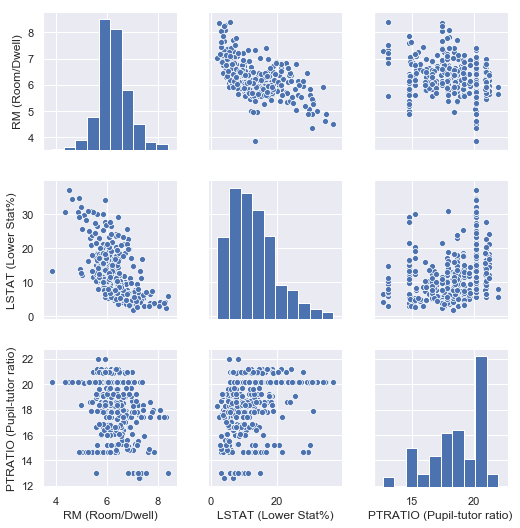

===Test Set===


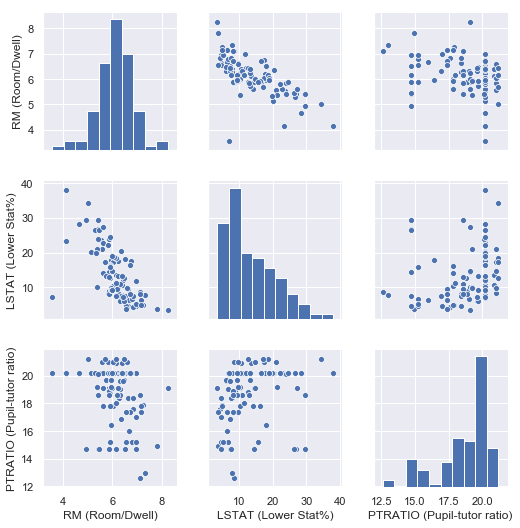

In [106]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
print("===Train Set===")
seaborn.pairplot(X_train)
plt.show()
print("===Test Set===")
seaborn.pairplot(X_test)
plt.show()

##### Shuffle = False

===Train Set===


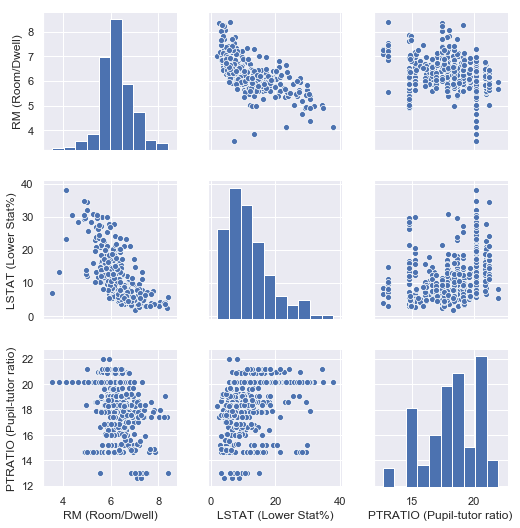

===Test Set===


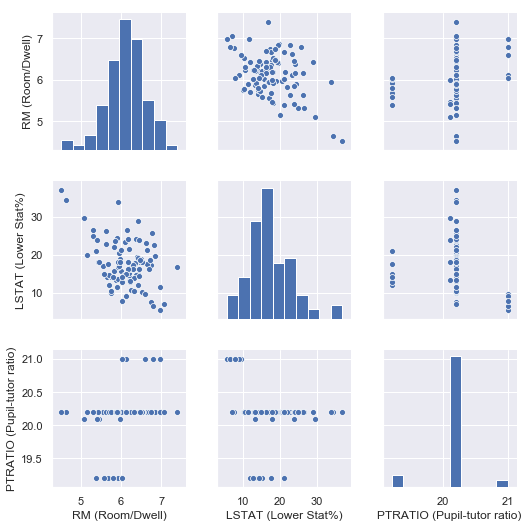

In [107]:
# Make shuffle = false
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features, prices, train_size=0.8, test_size=0.2, shuffle=False, random_state=43)
print("===Train Set===")
seaborn.pairplot(X_train_1)
plt.show()
print("===Test Set===")
seaborn.pairplot(X_test_1)
plt.show()

### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer:** 

From the above plots just having a loot at the data gives us the impression how they are spread with the training and testing set.
* When we are developing and tweaking a learning algorithm we would like to build confidence in the prediction of the algorithm. Splitting the data in testing and learning subsets lets us build that confidence. The training subset will be used to train the algorithm while testing subset can be used to test how well this algorithm will perform. If we use all the data to perform training then we are left with no data to test, so if we pick any random datum out of the training set to test our data it will give us wonderful prediction results. The reason being the algorithm has gone through __overfitting__. It may not generalize our model well enough for real world use.
* While training and splitting the data we have to be careful that the split is with a good percentage. Here we are doing the split with 80/20. We can even try with 70/30. This helps us having a balance between the training and testing.
* From the above 2 sets of plots we can see that shuffling the data also matters. This we can check clearly from the testing set of *PTRATIO*. The testing set does not show a diverse behaviour to test our model.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

/Users/i501980/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


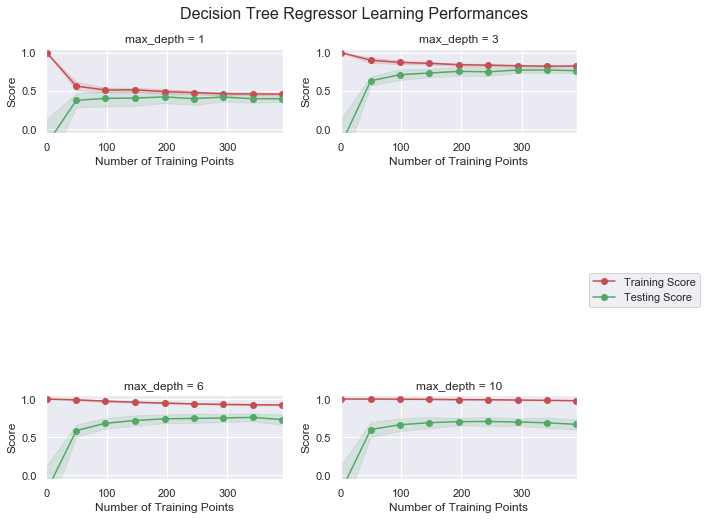

In [108]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model.
* What happens to the score of the training curve as more training points are added? What about the testing curve?
* Would having more training points benefit the model?

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary? Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:**

Let me choose the graph with `max_depth = 3`. This looks like the best graph in-terms of coeffecient of determination and points compared to the others here and the given training and testing points. The comparative *reason* being below:

**`General observation`**

- The convergence seems to happen mostly during the dataset itself.
- Score is pretty high for the training and testing sets.
- This model at `max_depth = 3` seems to be most likely converging at around 400-500.
- The score seems to rise quite fast before 100 points itself and the score for training and testing set seems to be quite near quite quick with samples starting around 50-60
- `max_depth = 10` seem to be *high variance* models. The training set seems to be biased with score of neary to 1 but the testing score is not converging quickly within the number of training points provided. Even the distance between the training and the testing scores are quite far. They dont seem to converge quickly.
- `max_depth = 6` seems to be the 2nd better model. This model seems to benefit from adding more training point as it may converge in some point. The testing score of `max_depth = 3` and `max_depth = 6` seems to be converging in same manner.

**`Conclusion`**

The above reasons mean that this model is a model that can give better predection of the dependent variable with the new independent variables.
- The split of the data for training and testing seems to be ideal.
- I believe adding more points may help in the convergence but considering it is currently in a good balance it may not drastically help.
- The training score does not drop drastically with number of sample points. Once it drops it remains mostly steady.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

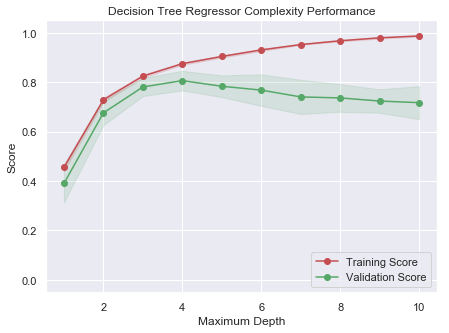

In [109]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:**

- When the model is trained with maximum depth of 1 the model suffers from high bias. Here we are trying to over simplyfy the model. The variance is low here as both the training and testing scores seem to be same.
- Here the training score is high and the testing scores is high too. The training and testing scores are very near almost overlapping. This means the model is having low bias and low variance. With depth = 10 thus seems to be an optimal model.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data?
* What intuition lead you to this answer?

**Hint:**
Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:**

I believe the `depth 4` captures the optimal depth for the model.

*Reason:*

- The score for training and testing set resides on 1. Depth 3 also looks similar but i believe it has a little less score considering the uncertainity in the validation score.
- Depth 4 has the least variance.
- Depth 4 has low bias.
- Anything after depth 4 seems to be having same variance and score for both training and testing set. So I believe depth 4 is the optimal depth.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Hint:** When explaining the Grid Search technique, be sure to touch upon why it is used, what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**

- Grid search is a technique which is useful in used in optimizing the various hyper-parameters.
- The grid in the grid search method comprises of the different hyper-parameters that we need to use and that needs to be optimized.
- This helps in choosing the best hyper-parameter combination for a particular model agains a criteria that is provided.
- For grid search to work we need to provide a list of all the hyper-parameters that we need to optimize.
    - Example: for the descisiontree classifier are (criterion = gini/entropy, splitter = best/random, and max_depth = 1/5/10/None)
- For grid search to work we also need to tell the grid search algorithm which kind of scoring (performance metrics like F1) mechanism we need to use.
- Once we provide all the details the grid search algorithm will go through all the parameter combination and find out the best parameter combination for us to use.
- Since the grid search algorithm needs the list of hyper-parameters to be provided it needs to be provided different parameters for different machine learning models.

### Question 8 - Cross-Validation
* What is the k-fold cross-validation training technique?
* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon using a particular subset of data for training or testing and how k-fold cv could help alleviate that. You can refer to the docs for your answer.

**Answer:**

- **What is KFold:** K-Fold is a cross-validation technique that is achieved by splitting the data into K buckets or subsamples. Here is the algorithm:
    1. Split the data into K buckets or subsamples called K_dataset_duckets such that $K >= 2$
    2. For current_bucket in K_dataset_duckets:
        * Use `K_dataset_duckets - current_bucket` as training set and train the data
        * Use current_bucket as testing set and test the model
        * Cross validate the model and take the cv_result
    3. Average the cross-validation results to produce a single estimation something like $avg = \frac{\sum_{i=0}^{K} cv\_result_i}{K}$
- **Benefits:** K-Fold helps us deal with the following scenarios:
    * Sometimes when we are tuning our hyper parameters and we are only using training and testing set and not using vaildation set there is a chance that we overfit the model by high tuning the hyper-parameters during the various iterations (Like in grid search). This is a kind of information leakage from the training set that happens to our training model.
    * If we split our data into training set, testing set and validation set then we actually loose the data points we can train our model on. This can be important when the data points are not too large. Missing our training on such data may lead to kind of a selection bias.
    * `Effecient use of Data` - Having K-Fold we do not have to split this data into training and testing set, hence we get to train our model on the whole data set.
- **Possible drawback:** K-Fold is a iterative process hence slow, but it still gives us a better chance at training our model and not overfitting it.

In [110]:
# Example of K-Fold and how it splits the data
from sklearn.model_selection import KFold
X = range(20)
kf = KFold(5, shuffle = True)
for train, test in kf.split(X):
    print("Train: %s / Test: %s" % (train, test))

Train: [ 0  1  4  5  6  7  9 10 11 12 13 14 15 16 17 19] / Test: [ 2  3  8 18]
Train: [ 0  1  2  3  4  6  7  8  9 11 12 14 15 16 17 18] / Test: [ 5 10 13 19]
Train: [ 0  1  2  3  5  6  8  9 10 11 13 14 16 17 18 19] / Test: [ 4  7 12 15]
Train: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 18 19] / Test: [ 6 14 16 17]
Train: [ 2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19] / Test: [ 0  1  9 11]


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [111]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 43)

    # Create a decision tree regressor object
    # Applying the descision tree to the regression problem (Continous output)
    # This is a small dataset. So this may speed up the operation for now
    splitter = "best"
#     splitter = "random"
    regressor = DecisionTreeRegressor(random_state=43, presort=True, splitter=splitter)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10. 11 is not included
    params = {'max_depth' : range(1, 11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # This is the estimating function
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets, verbose=0, pre_dispatch=3, n_jobs=3, refit=True)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.


### Question 9 - Optimal Model
- What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [112]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

print(reg)
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
           random_state=43, splitter='best')
Parameter 'max_depth' is 4 for the optimal model.


**Hint** The answer comes from the output of the code snipped above.

**Answer:**

The `max_depth` I get here is `4`. The one I guessed in question 6 is `4`. Seeing the graph at Question 6 it self tells that the optimal depth is 4. After 4 the variance increases and hence it cannot be taken as an optimal score.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

- What price would you recommend each client sell his/her home at?
- Do these prices seem reasonable given the values for the respective features?

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response. Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $404,478.26
Predicted selling price for Client 2's home: $229,043.18
Predicted selling price for Client 3's home: $936,775.00

Prices details:
count          489.00
mean       454,342.94
std        165,340.28
min        105,000.00
25%        350,700.00
50%        438,900.00
75%        518,700.00
max      1,024,800.00
Name: MEDV, dtype: object

Feature details:
       RM (Room/Dwell)  LSTAT (Lower Stat%)  PTRATIO (Pupil-tutor ratio)
count       489.000000           489.000000                   489.000000
mean          6.240288            12.939632                    18.516564
std           0.643650             7.081990                     2.111268
min           3.561000             1.980000                    12.600000
25%           5.880000             7.370000                    17.400000
50%           6.185000            11.690000                    19.100000
75%           6.575000            17.120000                    20.200000
max     

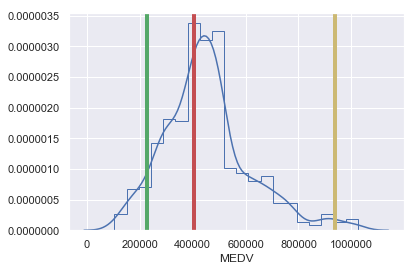

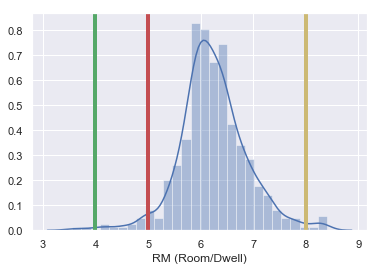

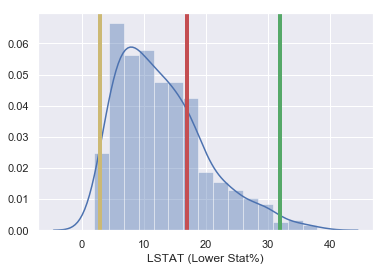

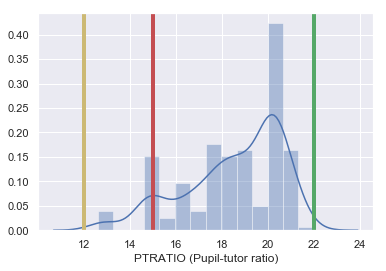

In [160]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
client_prices = []
client_colors = ['r', 'g', 'y']
for i, price in enumerate(reg.predict(client_data)):
    client_prices.append(price)
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

# Bringing in the stats here to have a better view
# Describe the prices value with proper formatting
print("\nPrices details:")
print(prices.describe().apply(lambda x: format(x, ',.2f')))
print("\nFeature details:")
print(features.describe())

sns.distplot(a=prices, label=median_value_column_name, hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1}, bins = 20)
count = 0
for c in client_prices:
    plt.axvline(x=c, linewidth=4, color=client_colors[count])
    count += 1
plt.show()

sns.distplot(a=features[room_dwell_column_name], label=room_dwell_column_name)
count = 0
for c in client_data:
    plt.axvline(x=c[0], linewidth=4, color=client_colors[count])
    count += 1
plt.show()

sns.distplot(a=features[lower_status_column_name], label=lower_status_column_name)
count = 0
for c in client_data:
    plt.axvline(x=c[1], linewidth=4, color=client_colors[count])
    count += 1
plt.show()

sns.distplot(a=features[pupil_tutor_ratio_column_name], label=pupil_tutor_ratio_column_name)
count = 0
for c in client_data:
    plt.axvline(x=c[2], linewidth=4, color=client_colors[count])
    count += 1
plt.show()

**Answer:**

- *Client 1 (Red Color), Predicted Price = $404,478.26:*

    * 5 bed room flats are less so the supply is less. If the demand rises then it may even fetch more price. **+ve for Price**
    * LSTAT ratio for Client 1 is kind of in the higher side, considering this the price predicted is quite good. **-ve for Price**
    * Student pupil ratio is quite high. But its near to the mean and the standard deviation is only 2. **Neutral for Price**
    * *Conclusion:* Considering all these the price predicted is quite good for client 1. Client 1 has got a good prediction for his house price very near to the mean price and standard deviation is quite high.
    
- *Client 2 (Green Color), Predicted Price = $229,043.18:*

    * The number of rooms to dwell is quite less. Which is on quite low side nearly to the beginning of the curve (Almost near to min) **-ve for Price**
    * LSTAT is quite high. It's almost towards the max LSTAT considering the standard deviation. **-ve for Price** 
    * The studen/teacher ratio is quite high, infact its same as max value. If a family with kids want to move in to this place this is not a attractive feature. **-ve for Price**
    * *Conclusion:* The cost mentioned is on below the 25 percentile range. I believe the predicted price is Okay. Considering the mean and std (454,342.94 - 165,340.28 = 289002.66). Still the house on sale is not having any attractive features to meet this value.
    
- *Client 3 (Yellow Color), Predicted Price = $936,775.00:*

    * Number of dwell rooms is Near to maximum. **+ve for Price**
    * LSTAT is low, infact its near to min value nearly 1/4th of mean. **+ve for Price**
    * Student.Teacher ratio is minimum value. **+ve for Price**
    * *Conclusion:* All the characteristics seem to be +ve But the price is near max value. Way above the mean. Some one may find a room with 7 bedrooms with all the same features in lesser price. So selling this house with this price is not going to be an easy task. But I belive the price quoted is justifiable unless we get more feature set to analyze.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.**

In [161]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $400,350.00
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability
* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**
- The data collected is old. Currently I have observed a lot of changes in the cities. From persional experience the price ranges in 1978 and 2018 can be drastically different.
- This data only shows the data from Boston which is an urban area, rural areas may have different other challenges and hence different other features to be considered.
- The dataset has a lot of other features that we are not considering. For example the age factor is a significant factor in deciding the price. This will let us know if the student/pupil ratio is relevent or not, how many are retired and how many are working class. Working population needs accessibility to the work place etc. So adding more data point will definitely help.
- The model seems to be *Okay* enough to predict housing prices for 1978, but I believe at least more features needs to be added to estimate the prices better.
- Yes it is fair to judge the price for a person who is planning to buy a property, but the features to be considered should be more exhaustive thant the once we are considering in this example.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.